### Semana 07 - amostragem e teste de hipóteses

  - distribuições e amostragens
  - distância entre distribuições - tamanho do efeito
  - distribuição chi-quadrado, t-student e normal (gaussiana)
  - teste de hipótese:
      - chi-quadrado
      - t-student
      - revisitando: p-value, intervalo de confiança, tamanho de efeito
      - comentário rápido de outros testes incluso não paramétricos.
  - casos e exercícios


### Distribuição normal centrada em 2.5 com SSD = .5

In [2]:
import os, sys, math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt # matplotlib e seu alias plt
%matplotlib inline

In [15]:
N = 1000
MU = 2.5; SD = 0.5
x = np.random.normal(MU, SD, N)

mu  = np.mean(x)
med = np.median(x)
ssd = np.std(x)
vc  = ssd/mu

mu, med, ssd, vc

(2.4990484288429435,
 2.4979961797437444,
 0.4915183899004736,
 0.19668221881079992)

(0.5329748692410492, 4.465121988444838)

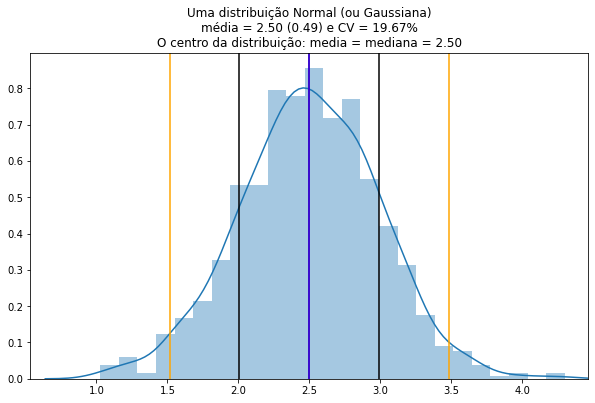

In [16]:
title = "Uma distribuição Normal (ou Gaussiana)\nmédia = %.2f (%.2f) e CV = %.2f%%"%(mu, ssd, vc*100)
title += "\nO centro da distribuição: media = mediana = %.2f"%(med)

fig = plt.figure(figsize=(10,6))
ax = sns.distplot(x, hist=True, kde=True)
ax.axvline(mu, color='red')
ax.axvline(med, color='blue')
ax.axvline(mu+1*ssd, color='black')
ax.axvline(mu-1*ssd, color='black')
ax.axvline(mu+2*ssd, color='orange')
ax.axvline(mu-2*ssd, color='orange')
ax.set_title(title)
ax.set_xlim(mu-4*ssd, mu+4*ssd)

### Amostragem

#### agora vamos simular um experimento no lab com somente 3 amostras!

In [7]:
Nlab = 3
x = np.random.normal(MU, SD, Nlab)

muLab  = np.mean(x)
medLab = np.median(x)
ssdLab = np.std(x)
vcLab  = ssdLab/muLab

muLab, medLab, ssdLab, vcLab


(2.6063236205235722,
 2.769481562981272,
 0.2417032845299235,
 0.09273724975157492)

In [8]:
(muLab-mu), (medLab - med), (ssdLab - ssd), (vcLab - vc)

(0.08780114698442398,
 0.2628984590507759,
 -0.26186618595694644,
 -0.10720913777429457)

In [10]:
"Erro de media = %.1f%%, mediana = %.1f%%, SSD = %.1f%%, VC = %.1f%%"%(100*(muLab-mu)/mu, 100*(medLab - med)/med, 100*(ssdLab - ssd)/ssd, 100*(vcLab - vc)/vc)

'Erro de media = 3.5%, mediana = 10.5%, SSD = -52.0%, VC = -53.6%'

### Agora vamos analisar o erro e desvio padrão amostral médio

In [11]:
iloop = 50
muLabs=[]; medLabs=[]; ssdLabs=[]; vcLabs=[];

for i in range(iloop):
    x = np.random.normal(MU, SD, Nlab)

    muLab  = np.mean(x)
    medLab = np.median(x)
    ssdLab = np.std(x)
    vcLab  = ssdLab/muLab

    muLabs.append(muLab)
    medLabs.append(medLab)
    ssdLabs.append(ssdLab)
    vcLabs.append(vcLab)
    

In [12]:
"Erro de media = %.1f%%, mediana = %.1f%%, SSD = %.1f%%, VC = %.1f%%"%(
    100*(np.mean(muLabs)  - mu) /mu,  100*(np.mean(medLabs) - med)/med, 
    100*(np.mean(ssdLabs) - ssd)/ssd, 100*(np.mean(vcLabs)  - vc)/vc)

'Erro de media = -1.3%, mediana = -0.3%, SSD = -33.8%, VC = -32.2%'

### Qual o problema??

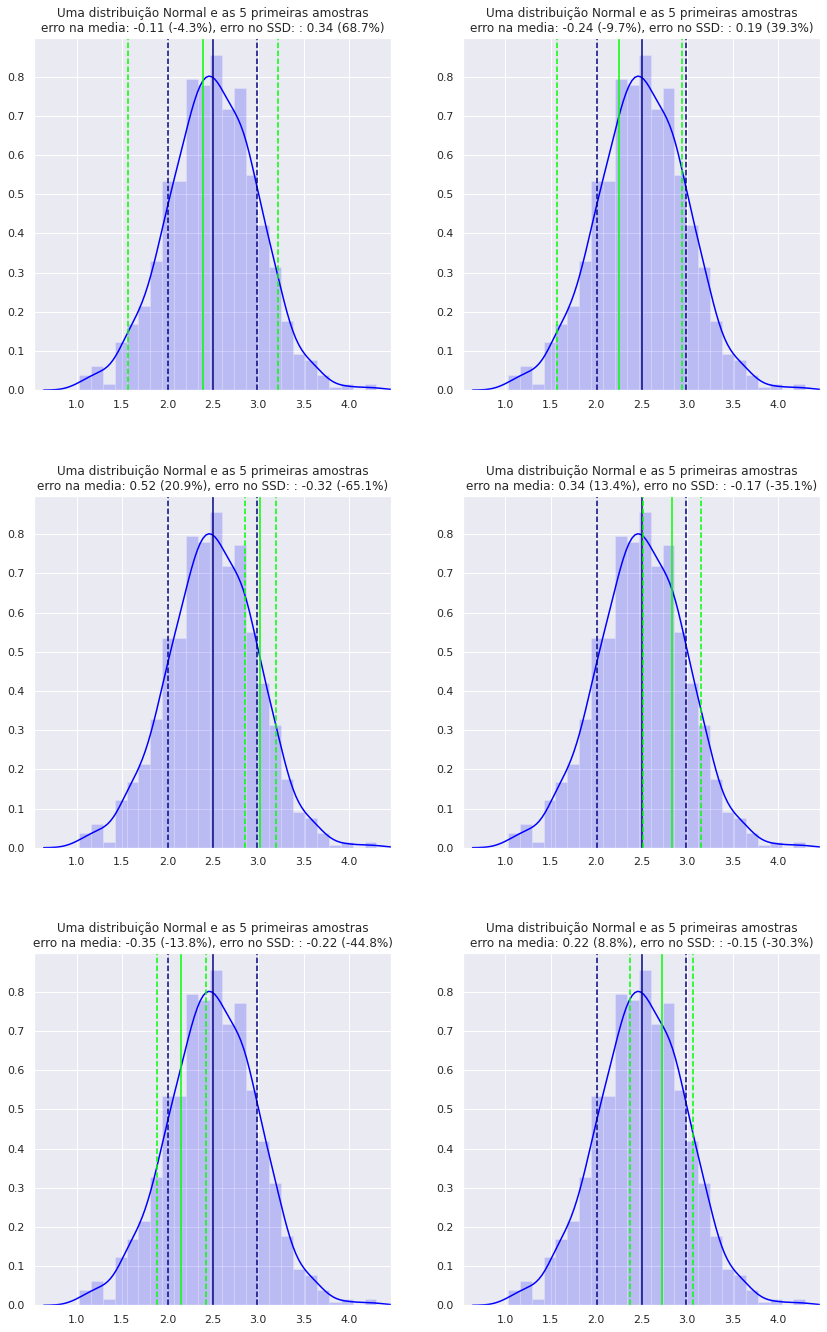

In [49]:
from pylab import subplot

# https://matplotlib.org/3.1.0/gallery/color/named_colors.html
colors2 = ['yellow', 'red', 'brown', 'blue', 'darkviolet', 'lime']
colors = ['lime']*6

sns.set(rc={"figure.figsize": (14,22)})

title = "Uma distribuição Normal e as 5 primeiras amostras"

nfig = 0
for i in range(6):
    nfig += 1
    subplot(3,2,nfig)
        
    ax = sns.distplot(x, hist=True, kde=True, color='blue', hist_kws=dict(alpha=.2))
    ax.axvline(mu, color='navy')
    ax.axvline(mu+1*ssd, color='navy', linestyle='--')
    ax.axvline(mu-1*ssd, color='navy', linestyle='--')

    mu2  = muLabs[i]
    ssd2 = ssdLabs[i]
    
    ax.axvline(mu2, color=colors[i])
    ax.axvline(mu2+1*ssd2, color=colors[i], linestyle='--')
    ax.axvline(mu2-1*ssd2, color=colors[i], linestyle='--')
        
    ax.set_xlim(mu-4*ssd, mu+4*ssd)
    
    emu = mu2 - mu
    essd = ssd2 - ssd
    
    p_emu  = 100*(mu2 - mu)/mu
    p_essd = 100*(ssd2 - ssd)/ssd

    title2 = title + "\nerro na media: %.2f (%.1f%%), erro no SSD: : %.2f (%.1f%%)"%(emu, p_emu, essd, p_essd)
    
    plt.title(title2)
    
plt.subplots_adjust(left=0.12, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.3)  

### Qual o problema??